# Exploratory Analysis


 We make an exploratory analysis to better understand the data. There are 50,000 articles with no missing values, except for 2 missing values in the title column.The labels "meshroot" that we will use for our classification are 15 in total that are combined for each article. 
 
 Each label has a different distribution (from 46,000 to 1,100) making the dataset an inmbalanced one. We use SMOTE technique for the smaller class to increase the articles from 1100 to 5000, and then we take 5000 samples from each class so that we have a balanced dataset.

 Finally we count the length and the language of the articles. The vast majority has a length from 0 to 3000 words. So we set as acceptable length for an article from 300 words to 3000 words, so that we exclude outliers. Langdetect detected 5 articles that were not in English, but after visually inspecting these articles they were false negatives.

In [2]:
import pandas as pd
import ast

# Load the dataset
data = pd.read_csv('../data/articles.csv')
data["meshroot"] = data["meshroot"].apply(ast.literal_eval)  # apply literal_eval because lists appear as strings
#data["meshMajor"] = data["meshMajor"].apply(ast.literal_eval) 
#data["meshid"] = data["meshid"].apply(ast.literal_eval) 
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         49998 non-null  object
 1   abstractText  50000 non-null  object
 2   meshMajor     50000 non-null  object
 3   pmid          50000 non-null  int64 
 4   meshid        50000 non-null  object
 5   meshroot      50000 non-null  object
 6   A             50000 non-null  int64 
 7   B             50000 non-null  int64 
 8   C             50000 non-null  int64 
 9   D             50000 non-null  int64 
 10  E             50000 non-null  int64 
 11  F             50000 non-null  int64 
 12  G             50000 non-null  int64 
 13  H             50000 non-null  int64 
 14  I             50000 non-null  int64 
 15  J             50000 non-null  int64 
 16  L             50000 non-null  int64 
 17  M             50000 non-null  int64 
 18  N             50000 non-null  int64 
 19  Z   

Inspect the articles visually 

In [13]:
data['abstractText'][0:10]

0    Fifty-four paraffin embedded tissue sections f...
1    The present cross-sectional study was conducte...
2    The occurrence of individual amino acids and d...
3    In 1980, Lim and Sun introduced a microcapsule...
4    Substantially improved hydrogel particles base...
5    Panolis is a well-defined and compact Palearct...
6    At the Krsko Nuclear Power Plant (NPP), albedo...
7    BACKGROUND: This study was designed to compare...
8    Patch-clamp techniques were used to study the ...
9    INTRODUCTION: Hospital evacuations of patients...
Name: abstractText, dtype: object

## Inspect the labels 

In [22]:
# Check label distribution
print(data['meshMajor'].value_counts())
print(data['pmid'].value_counts())
print(data['meshid'].value_counts())
print(data['meshroot'].value_counts())


meshMajor
[Algorithms, Models, Theoretical]                                                                                                                                                                                                                                                                                                                                                                                                                               3
[Aged, Biopsy, Large-Core Needle, Humans, Kallikreins, Logistic Models, Magnetic Resonance Imaging, Male, Margins of Excision, Middle Aged, Multivariate Analysis, Neoplasm Grading, Neoplasm Staging, Nomograms, Organ Size, Prognosis, Prostate, Prostate-Specific Antigen, Prostatectomy, Prostatic Neoplasms, ROC Curve, Retrospective Studies, Tumor Burden]                                                                                               2
[Denmark, Humans, Social Security, Unemployment]                                          

In [3]:
from collections import Counter

# Flatten the list of strings into a single list
all_labels = [label for sublist in data['meshroot'] for label in sublist]

label_counts = Counter(all_labels)
label_counts_df = pd.DataFrame(label_counts.items(), columns=['meshroot', 'Count'])
label_counts_df = label_counts_df.sort_values(by='Count', ascending=True).reset_index(drop=True)
label_counts_df["label"] = label_counts_df["meshroot"].str.extract(r'\[([^\]]+)\]')
print("\nLabel Counts:")
print(label_counts_df)



Label Counts:
                                             meshroot  Count label
0                                      Humanities [K]   1153     K
1           Technology, Industry, and Agriculture [J]   5531     J
2   Anthropology, Education, Sociology, and Social...   5595     I
3                     Disciplines and Occupations [H]   6069     H
4                             Information Science [L]   7503     L
5                                   Geographicals [Z]   8049     Z
6                       Psychiatry and Psychology [F]   8885     F
7                                    Named Groups [M]  21363     M
8                                     Health Care [N]  22919     N
9                                         Anatomy [A]  23263     A
10                                       Diseases [C]  26453     C
11                            Chemicals and Drugs [D]  31074     D
12                        Phenomena and Processes [G]  33609     G
13  Analytical, Diagnostic and Therapeutic Tech

C:\Users\User\AppData\Local\Temp\ipykernel_15152\4101697776.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='Count', data=label_counts_df, palette='viridis')


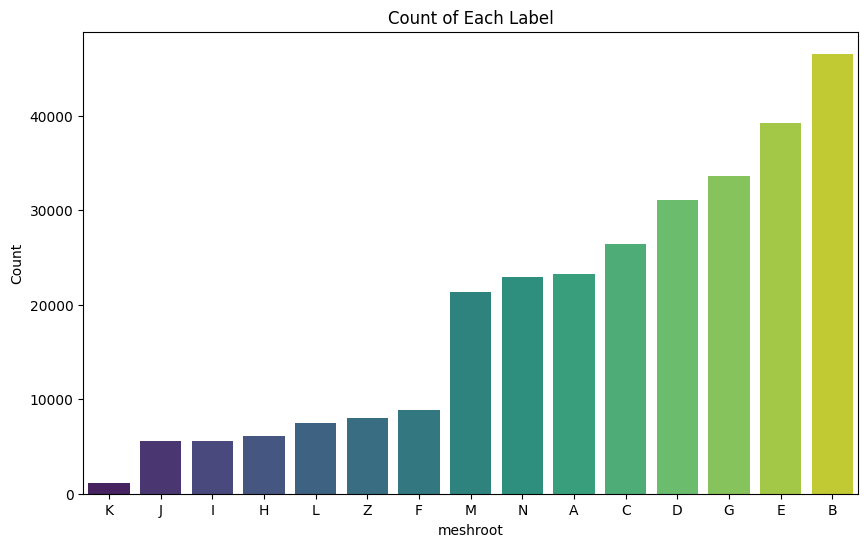

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='Count', data=label_counts_df, palette='viridis')
plt.title('Count of Each Label')
plt.xlabel('meshroot')
plt.ylabel('Count')
plt.show()

## Count the length of the articles

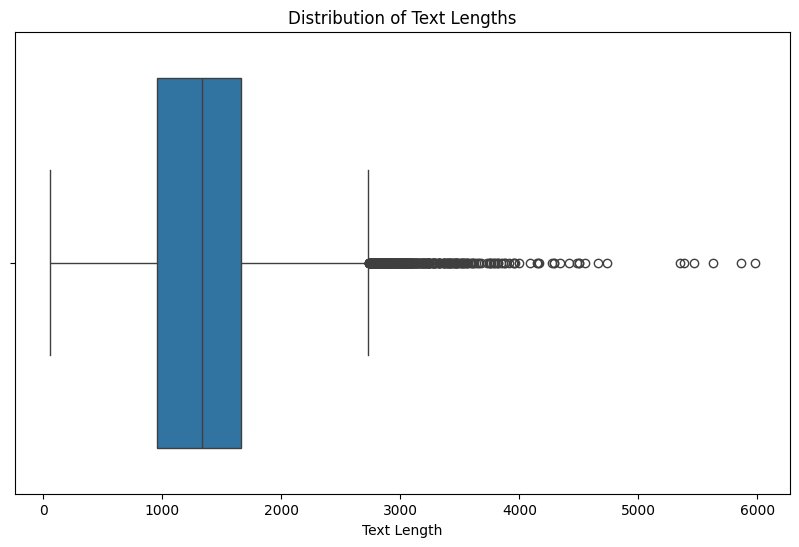

In [28]:
data["text_length"] = data["abstractText"].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(x=data["text_length"])

plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.show()

## Language of texts

In [45]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'
    
data['language'] = data['abstractText'].apply(detect_language)

# check if all articles are in English
print(all(data["language"]=="en"))

False


In [44]:
# visually inpect the articles that we re classified as non-english
non_english_articles = data[data['language'] != 'en']
non_english_articles

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,...,F,G,H,I,J,L,M,N,Z,language
7184,Evaluation of locked plate in the osteosynthes...,BACKGROUND: The use of conventional dynamic co...,"[Adult, Aged, Bone Plates, Female, Fracture Fi...",28671153,"[[M01.060.116], [M01.060.116.100], [E07.695.37...","[Named Groups [M], Analytical, Diagnostic and ...",0,1,1,0,...,0,1,0,0,0,0,1,1,0,fr
7982,Social Representations of Gynecologic Cancer S...,The purpose of this work was to explore: knowl...,"[Decision Making, Early Detection of Cancer, E...",27384278,"[[F02.463.785.373], [E01.390.500], [Z01.107.75...","[Psychiatry and Psychology [F], Analytical, Di...",0,1,1,0,...,1,0,1,0,0,0,0,1,1,es
12522,Binge eating and binge-eating disorder in Blac...,OBJECTIVE: Although several effective behavior...,"[African Americans, Binge-Eating Disorder, Fem...",31922293,"[[M01.686.508.100.100, M01.686.754.100], [F03....","[Named Groups [M], Psychiatry and Psychology [...",0,1,0,0,...,1,0,0,0,0,0,1,0,0,es
31168,Foot length measurements of newborns of high a...,OBJECTIVE: Comparing foot length measurements ...,"[Brazil, Cross-Sectional Studies, Female, Foot...",28300963,"[[Z01.107.757.176], [E05.318.372.500.875, N05....","[Geographicals [Z], Analytical, Diagnostic and...",1,1,0,0,...,0,1,0,0,0,0,1,1,1,es
37839,The Strongyloides stercoralis-hookworms associ...,TRIAL REGISTRATION: PROSPERO (registration cod...,"[Animals, Global Burden of Disease, Humans, So...",32282827,"[[B01.050], [N05.425.184, N06.850.520.308.980....","[Organisms [B], Health Care [N], Chemicals and...",0,1,1,1,...,0,1,0,0,0,0,0,1,0,it


## Sample 3000 rows from each label

In [68]:
data["text_length"] = data["abstractText"].apply(len)
filtered_df = data[(data['text_length'] >= 100) & (data['text_length'] <= 3300)]

# Reset the index of the filtered DataFrame
filtered_df.reset_index(drop=True, inplace=True)

all_labels = [label for sublist in data['meshroot'] for label in sublist]
label_counts = Counter(all_labels)
label_counts_df = pd.DataFrame(label_counts.items(), columns=['meshroot', 'Count'])
label_counts_df = label_counts_df.sort_values(by='Count', ascending=True).reset_index(drop=True)

data_expanded = data.explode('meshroot')
sampled_df = pd.DataFrame()
sampled_indices = set()

for label in label_counts_df['meshroot']:
    count = data.loc[list(sampled_indices)]['meshroot'].apply(lambda x: label in x).sum() #count how many rows for this label we sampled from previous iterations
    label_rows = data_expanded[(data_expanded['meshroot'] == label) & (~data_expanded.index.isin(sampled_indices))] # expand df for easier sampling
    
    # Sample 1000 rows minus the one we already sampled
    n_samples = 5000
    if n_samples - count > 0:
        sampled_label_rows = label_rows.sample(n=min(n_samples-count, len(label_rows)), random_state=42)
        sampled_indices.update(sampled_label_rows.index)

sampled_data = data.loc[list(sampled_indices)]
sampled_data.reset_index(inplace=True)
sampled_data.drop(columns=['index'], inplace=True)

sampled_data.to_csv("../data/sampled_data.csv")
sampled_data

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,...,F,G,H,I,J,L,M,N,Z,text_length
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","[Chemicals and Drugs [D], Organisms [B], Analy...",0,1,1,1,...,0,0,1,0,0,0,0,0,0,760
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","[Named Groups [M], Chemicals and Drugs [D], Ps...",0,1,1,1,...,1,1,0,1,1,0,1,1,1,1747
2,QSAR model for predicting cell viability of hu...,A predictive model for the viability (%) of cu...,"['Calibration', 'Cell Survival', 'Cytotoxins',...",26439516,"[['E05.978.155'], ['G04.346'], ['D27.888.569.2...","[Analytical, Diagnostic and Therapeutic Techni...",1,1,0,1,...,0,1,0,0,1,1,0,0,0,702
3,Quantifying the Holocaust: Hyperintense kill r...,Operation Reinhard (1942-1943) was the largest...,"['Concentration Camps', 'Crime Victims', 'Hist...",30613773,"[['I01.880.604.787.358', 'J03.200'], ['M01.135...","[Anthropology, Education, Sociology, and Socia...",0,1,0,0,...,0,0,0,1,1,0,1,0,1,991
4,Multilayer capsules: a promising microencapsul...,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",11426874,"[['D05.750.716.822.111', 'D25.720.716.822.111'...","[Chemicals and Drugs [D], Technology, Industry...",1,1,1,1,...,0,1,0,0,1,0,0,0,0,1870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16536,Racial/Ethnic and Socioeconomic Disparities in...,OBJECTIVES: To evaluate whether differences in...,"['Adult', 'Beverages', 'Continental Population...",28727528,"[['M01.060.116'], ['G07.203.100', 'J02.200'], ...","[Named Groups [M], Phenomena and Processes [G]...",0,1,0,0,...,0,1,0,1,1,0,1,1,0,1402
16537,Fragment-based lead discovery: screening and o...,Fragment-based drug discovery has gained a foo...,"['Aspirin', 'Binding Sites', 'Computer Simulat...",20394106,"[['D02.455.426.559.389.657.410.595.176'], ['G0...","[Chemicals and Drugs [D], Phenomena and Proces...",0,0,0,1,...,0,1,1,0,0,1,0,0,0,1021
16538,Effectiveness of Population Health Management ...,BACKGROUND: Telehealth strategies for asthma h...,"['Adrenergic beta-Agonists', 'Adult', 'Anti-As...",26778246,"[['D27.505.519.625.050.100.200', 'D27.505.696....","[Chemicals and Drugs [D], Named Groups [M], Di...",0,1,1,1,...,0,0,1,0,0,1,1,1,0,1800
16539,The Dutch Cannabis Dependence (CanDep) study o...,This paper presents an overview of the prospec...,"['Adolescent', 'Adult', 'Age of Onset', 'Cohor...",21815231,"[['M01.060.057'], ['M01.060.116'], ['N05.715.3...","[Named Groups [M], Health Care [N], Analytical...",0,1,1,0,...,1,1,1,0,0,1,1,1,1,1461


In [34]:
import torch
from transformers import BartForConditionalGeneration, BartTokenizer

input_sentence = data["abstractText"][0]

model = BartForConditionalGeneration.from_pretrained('eugenesiow/bart-paraphrase')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
tokenizer = BartTokenizer.from_pretrained('eugenesiow/bart-paraphrase')
batch = tokenizer(input_sentence, return_tensors='pt')
generated_ids = model.generate(batch['input_ids'])
generated_sentence = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

print(generated_sentence)

c:\Users\User\Documents\PubMed\venv\Lib\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['Fifty-four paraffin embedded tissue sections from patients with dysplasia (21']
